In [1]:
import json
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
from scipy.stats import kurtosis, skew,norm
import numpy as np
import warnings
warnings.filterwarnings("ignore")

import numpy as np
import pandas as pd
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score, mean_squared_error
import statsmodels.api as sm
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [2]:
data=pd.read_csv("/Users/rogarciag/Desktop/AI_&_TRADING/ALGORITHMIC_TRADING/PRINCIPAL/NASINI/TRABAJOS_GENERAL/PROYECTO_TRADING/BASES_DE_DATOS/DATOS_CSV/AL30_COMPLETE_TASAS.csv")

In [3]:
time_series = pd.DataFrame(columns=['date','spread'])
# modifiique los nombres así era más claro

#APLICAR EXPONENTE HURST
data["SPREAD_COLOCAR_PLAZO_CERCANO"] = data["COLOCAR_TASA_ABRIENDO_PLAZO_CERCANO_TASA"] - (data["caucion_a_un_dia_ultimo_trade_tasa"] / 100)
data["SPREAD_COLOCAR_PLAZO_LEJANO"] = data["COLOCAR_TASA_ABRIENDO_PLAZO_LEJANO_TASA"] - (data["caucion_a_un_dia_ultimo_trade_tasa"] / 100)

data["SPREAD_TOMAR_PLAZO_CERCANO"] =data["TOMAR_TASA_ABRIENDO_PLAZO_CERCANO_TASA"] - (data["caucion_a_un_dia_ultimo_trade_tasa"] / 100) 
data["SPREAD_TOMAR_PLAZO_LEJANO"] = data["TOMAR_TASA_ABRIENDO_PLAZO_LEJANO_TASA"] - (data["caucion_a_un_dia_ultimo_trade_tasa"] / 100)

data_general=data[["caucion_a_un_dia_ultimo_trade_tasa","SPREAD_COLOCAR_PLAZO_CERCANO","SPREAD_COLOCAR_PLAZO_LEJANO","SPREAD_TOMAR_PLAZO_CERCANO","SPREAD_TOMAR_PLAZO_LEJANO"]]

threshold_arbitrage=0

for index, row in data_general.iterrows():
    #Elegimos el mejor spread para colocar y tomar
    if  row["SPREAD_COLOCAR_PLAZO_CERCANO"] > row["SPREAD_COLOCAR_PLAZO_LEJANO"]:
         spread_colocar = row["SPREAD_COLOCAR_PLAZO_CERCANO"]
    else:
        spread_colocar = row["SPREAD_COLOCAR_PLAZO_LEJANO"]

    if row["SPREAD_TOMAR_PLAZO_CERCANO"] < row["SPREAD_TOMAR_PLAZO_LEJANO"]:
        spread_tomar = row["SPREAD_TOMAR_PLAZO_CERCANO"]

    else:
        spread_tomar = row["SPREAD_TOMAR_PLAZO_LEJANO"]

    # CASO NO PASA NADA
    if row["SPREAD_COLOCAR_PLAZO_CERCANO"] < threshold_arbitrage and row["SPREAD_COLOCAR_PLAZO_LEJANO"] < threshold_arbitrage  and row["SPREAD_TOMAR_PLAZO_CERCANO"] > threshold_arbitrage and row["SPREAD_TOMAR_PLAZO_LEJANO"] > threshold_arbitrage:
        time_series = pd.concat([time_series, pd.DataFrame({'date':[index],'spread':[0]})],ignore_index=True)
        
    elif spread_colocar > 0 and spread_tomar < 0:

        if spread_colocar > -spread_tomar:
            
            time_series = pd.concat([time_series, pd.DataFrame({'date':[index],'spread':[spread_colocar]})],ignore_index=True)
        
        else:

            time_series = pd.concat([time_series, pd.DataFrame({'date':[index],'spread':[spread_tomar]})],ignore_index=True)

    elif spread_colocar > 0:

        time_series = pd.concat([time_series, pd.DataFrame({'date':[index],'spread':[spread_colocar]})],ignore_index=True)

    elif spread_tomar < 0:

        time_series = pd.concat([time_series, pd.DataFrame({'date':[index],'spread':[spread_tomar]})],ignore_index=True)
    else:
        time_series = pd.concat([time_series, pd.DataFrame({'date':[index],'spread':[0]})],ignore_index=True)
        #print("hola")

In [8]:
x=time_series["spread"]
y=data_general=data[["SPREAD_COLOCAR_PLAZO_CERCANO","SPREAD_COLOCAR_PLAZO_LEJANO","SPREAD_TOMAR_PLAZO_CERCANO","SPREAD_TOMAR_PLAZO_LEJANO"]]

<Axes: >

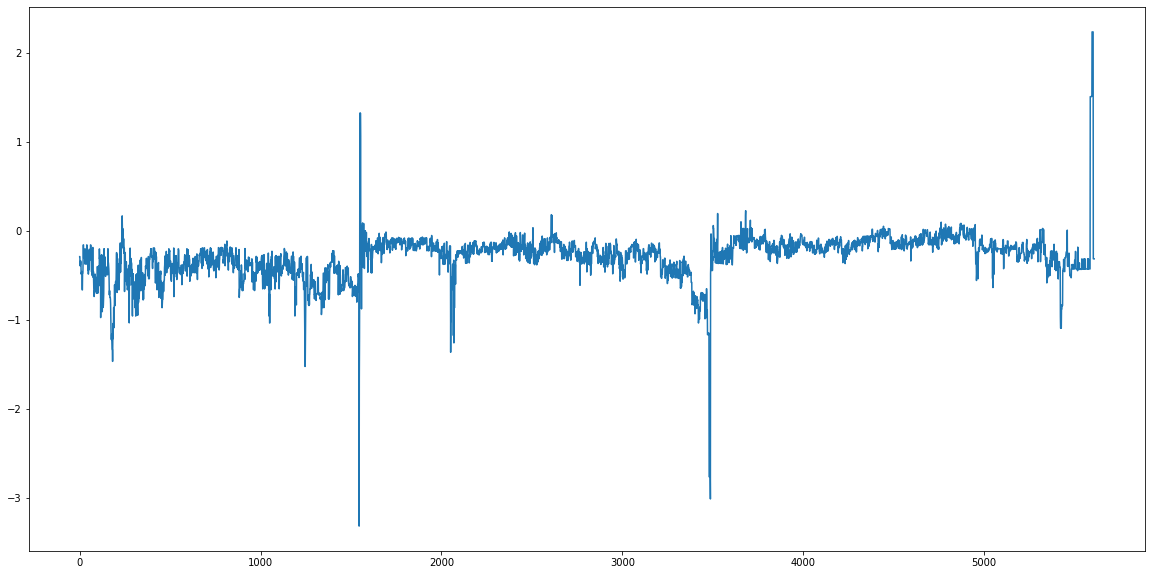

In [18]:
x.plot(figsize=(20,10))

<Axes: >

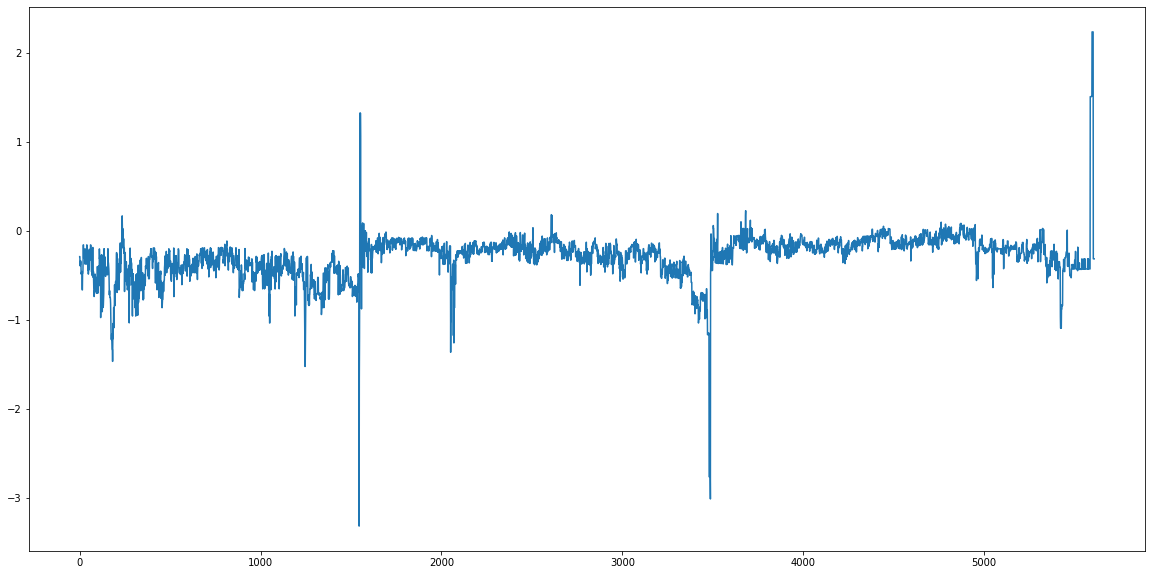

In [82]:
x.plot(figsize=(20,10))

In [ ]:
- 0.06. 0.03



In [84]:
x

0      -0.283472
1      -0.283472
2      -0.386162
3      -0.376788
4      -0.376788
          ...   
5605   -0.308743
5606   -0.308743
5607   -0.308743
5608   -0.308743
5609   -0.308743
Name: spread, Length: 5610, dtype: float64

<Axes: >

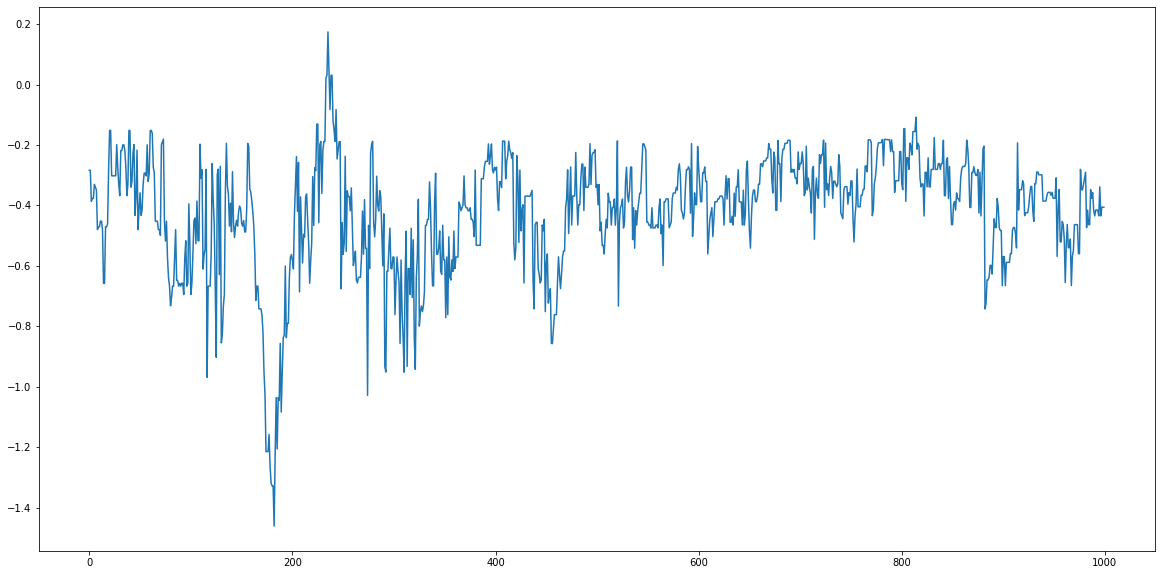

In [85]:
x[0:1000].plot(figsize=(20,10))

In [86]:
y

,SPREAD_COLOCAR_PLAZO_CERCANO,SPREAD_COLOCAR_PLAZO_LEJANO,SPREAD_TOMAR_PLAZO_CERCANO,SPREAD_TOMAR_PLAZO_LEJANO
0,-0.331579,-0.303819,-0.283472,-0.264432
1,-0.331579,-0.303819,-0.283472,-0.264432
2,-0.406487,-0.359940,-0.292747,-0.386162
3,-0.397114,-0.359940,-0.292747,-0.376788
4,-0.397114,-0.359940,-0.292747,-0.376788
...,...,...,...,...
5605,-0.324072,-0.619344,-0.304301,-0.308743
5606,-0.324072,-0.619344,-0.304301,-0.308743
5607,-0.324072,-0.619344,-0.304301,-0.308743
5608,-0.324072,-0.619344,-0.304301,-0.308743


In [87]:
import pandas as pd
import numpy as np
from scipy.stats import skew, kurtosis, entropy, iqr, median_abs_deviation
from scipy.spatial.distance import mahalanobis
import matplotlib.pyplot as plt

df=y
window_size = 60

# Create a new dataframe to store the scores
score_df = pd.DataFrame(index=df.index, columns=df.columns, dtype=int)

# Loop through the dataframe columns
for col in y.columns:
    # Calculate rolling metrics
    rolling_mean = df[col].rolling(window=window_size).mean()
    rolling_var = df[col].rolling(window=window_size).var()
    rolling_skew = df[col].rolling(window=window_size).apply(lambda x: skew(x), raw=False)
    rolling_kurt = df[col].rolling(window=window_size).apply(lambda x: kurtosis(x), raw=False)
    rolling_entropy = df[col].rolling(window=window_size).apply(lambda x: entropy(x), raw=False)
    rolling_abs_deviation = df[col].rolling(window=window_size).apply(lambda x: np.mean(np.abs(x - np.mean(x))), raw=False)
    rolling_iqr = df[col].rolling(window=window_size).apply(lambda x: iqr(x), raw=False)
    rolling_mad = df[col].rolling(window=window_size).apply(lambda x: median_abs_deviation(x), raw=False)

    # Calculate scores
    for i in range(window_size, len(df)):
        score = 0
        #if df[col][i] < rolling_mean[i]:
            #score += 1
        if df[col][i] > rolling_var[i]:
            score += 1 
        if df[col][i] > rolling_skew[i]:
            score += 1
        if df[col][i] > rolling_kurt[i]:
            score += 1
        if df[col][i] > rolling_entropy[i]:
            score += 1
        if df[col][i] > rolling_abs_deviation[i]:
            score += 1
        if df[col][i] > rolling_iqr[i]:
            score += 1
        if df[col][i] > rolling_mad[i]:
            score += 1

        score_df[col][i] = score

score_df.fillna(0, inplace=True)
score_df["Total"] = score_df["SPREAD_COLOCAR_PLAZO_CERCANO"] + score_df["SPREAD_COLOCAR_PLAZO_LEJANO"] + score_df["SPREAD_TOMAR_PLAZO_CERCANO"] + score_df["SPREAD_TOMAR_PLAZO_LEJANO"]
score_df



,SPREAD_COLOCAR_PLAZO_CERCANO,SPREAD_COLOCAR_PLAZO_LEJANO,SPREAD_TOMAR_PLAZO_CERCANO,SPREAD_TOMAR_PLAZO_LEJANO,Total
0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...
5605,2.0,0.0,0.0,2.0,4.0
5606,2.0,0.0,0.0,2.0,4.0
5607,2.0,0.0,0.0,2.0,4.0
5608,2.0,0.0,0.0,2.0,4.0


In [88]:
final_df=pd.DataFrame()
final_df["Total_Score"]=score_df["Total"]
final_df["Total_Spread"]=x

In [89]:
final_df.tail(60)

,Total_Score,Total_Spread
5550,0.0,-0.422136
5551,0.0,-0.422136
5552,0.0,-0.308743
5553,0.0,-0.422136
5554,0.0,-0.422136
5555,0.0,-0.422136
5556,0.0,-0.422136
5557,0.0,-0.422136
5558,0.0,-0.308743
5559,0.0,-0.422136


In [90]:
filter_df_trades=final_df[final_df["Total_Spread"]<-0.06]

In [ ]:
-0.06  puntaje=20 = -0.06 - 0.01
-0.06 puntaje = 10 - 0.06 - 0
-0.06 puntaje=15. -0.06-0.005

In [51]:
filter_df_trades

,Total_Score,Total_Spread
235,11.0,-0.194943
236,10.0,-0.061089
1545,12.0,-0.862113
1546,12.0,-0.851747
1547,12.0,-0.2902
...,...,...
5599,13.0,-2.262718
5600,13.0,-2.262718
5601,13.0,-2.262718
5602,13.0,-2.262718


In [52]:
filter_df_trades["Total_Score"].mean()

12.179775280898877

<Axes: >

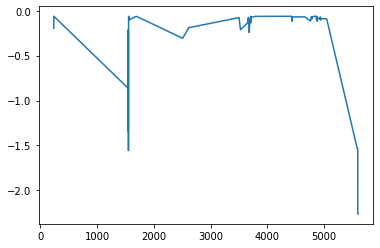

In [62]:
filter_df_trades["Total_Spread"]

In [40]:
filter_df_no_trades=final_df[final_df["Total_Spread"]==0]

In [41]:
filter_df_no_trades

,Total_Score,Total_Spread
0,0.0,0
1,0.0,0
2,0.0,0
3,0.0,0
4,0.0,0
...,...,...
5605,11.0,0
5606,11.0,0
5607,11.0,0
5608,11.0,0


In [42]:
filter_df_no_trades["Total_Score"].mean()

12.391922639362912

In [43]:
len(filter_df_no_trades)

5274

In [44]:
len(filter_df_trades)

336